In [ ]:
#First import the liabraries  
import io
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
#from google.colab import files
arquivos = files.upload()

In [ ]:
# create a funtion which will display the image
def display(img,count,cmap="gray"):
    f_image = cv2.imread("coins.jpeg")
    f, axs = plt.subplots(1,2,figsize=(12,5))
    axs[0].imshow(f_image,cmap="gray")
    axs[1].imshow(img,cmap="gray")
    axs[1].set_title("Total Money Count = {}".format(count))

In [ ]:
# Read the image and apply filter and threshold  
image = cv2.imread("coins.jpeg")
image_blur = cv2.medianBlur(image,25)
image_blur_gray = cv2.cvtColor(image_blur, cv2.COLOR_BGR2GRAY)
image_res ,image_thresh = cv2.threshold(image_blur_gray,240,255,cv2.THRESH_BINARY_INV)
kernel = np.ones((3,3),np.uint8)

opening = cv2.morphologyEx(image_thresh,cv2.MORPH_OPEN,kernel) 

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, last_image = cv2.threshold(dist_transform, 0.3*dist_transform.max(),255,0)
last_image = np.uint8(last_image)

cnts = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

#This funtion will count and draw the circle
for (i, c) in enumerate(cnts):
	((x, y), _) = cv2.minEnclosingCircle(c)
	cv2.putText(image, "#{}".format(i + 1), (int(x) - 45, int(y)+20),cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 5)
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)


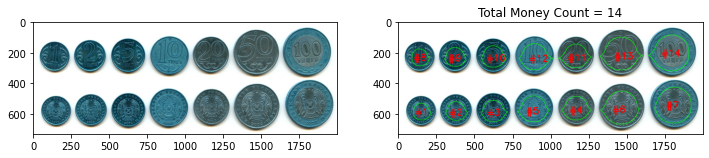

In [ ]:
# This funtion dispaly the image
display(image,len(cnts))